In [103]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# 1. importing data

In [104]:
xls = pd. ExcelFile('Convergence Dataset.xlsx')
df1 = pd. read_excel(xls, 'LikelytoChurn')
df1.head()

,ID,Switched,Factor#1,Factor#2,Factor#3,Factor#4,Factor#5,Factor#6,Factor#7,Factor#8,...,Factor#29,Factor#30,Factor#31,Factor#32,Factor#33,Factor#34,Factor#35,Factor#36,Factor#37,Factor#38
0,56302.0,No,100.0,100.0,0.000000,0.00000,0.0,NaN,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN
1,33363.0,No,0.0,100.0,0.000000,76.82757,0.0,0.0,0.0,1.0,...,0.0,4.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0,54.545455
2,33365.0,No,0.0,100.0,3.000000,0.00000,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.000000
3,56303.0,No,100.0,100.0,1.313472,0.00000,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,2.0,NaN,0.0,0.000000
4,56304.0,No,0.0,100.0,1.000000,99.00000,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.000000


In [105]:
#converting the Swtiched =Yes into 1s into 
df1['Switched']=df1['Switched'].map({'Yes':1, 'No':0})
#df1=pd.DataFrame(df[df['Switched']==1])

In [106]:

df1.head()


,ID,Switched,Factor#1,Factor#2,Factor#3,Factor#4,Factor#5,Factor#6,Factor#7,Factor#8,...,Factor#29,Factor#30,Factor#31,Factor#32,Factor#33,Factor#34,Factor#35,Factor#36,Factor#37,Factor#38
0,56302.0,0.0,100.0,100.0,0.000000,0.00000,0.0,NaN,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN
1,33363.0,0.0,0.0,100.0,0.000000,76.82757,0.0,0.0,0.0,1.0,...,0.0,4.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0,54.545455
2,33365.0,0.0,0.0,100.0,3.000000,0.00000,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.000000
3,56303.0,0.0,100.0,100.0,1.313472,0.00000,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,2.0,NaN,0.0,0.000000
4,56304.0,0.0,0.0,100.0,1.000000,99.00000,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.000000


In [107]:
print('The number of samples into the data df11 is {}.'.format(df1.shape[0]))

The number of samples into the data df11 is 5172.


# 2. Data Quality & Missing Value Assessment

In [108]:
# check missing values in dataframe df1
df1.isnull().sum()

ID              1
Switched        1
Factor#1        1
Factor#2        1
Factor#3        1
Factor#4        1
Factor#5        1
Factor#6      320
Factor#7        1
Factor#8        1
Factor#9        1
Factor#10       1
Factor#11      19
Factor#12       1
Factor#13       1
Factor#14     155
Factor#15       1
Factor#16    1907
Factor#17    1907
Factor#18    1907
Factor#19       1
Factor#20       1
Factor#21       1
Factor#22       1
Factor#23       1
Factor#24       1
Factor#25       1
Factor#26       1
Factor#27       1
Factor#28    1907
Factor#29       1
Factor#30     251
Factor#31       1
Factor#32      37
Factor#33     251
Factor#34       1
Factor#35       1
Factor#36    1846
Factor#37       1
Factor#38    1072
dtype: int64

In [109]:
# eliminating the row in "ID" which had null value
df1.drop(df1[df1['ID'].isna()].index,inplace=True)


In [110]:
# AGAIN check missing values in dataframe df1
df1.isnull().sum()

ID              0
Switched        0
Factor#1        0
Factor#2        0
Factor#3        0
Factor#4        0
Factor#5        0
Factor#6      319
Factor#7        0
Factor#8        0
Factor#9        0
Factor#10       0
Factor#11      18
Factor#12       0
Factor#13       0
Factor#14     154
Factor#15       0
Factor#16    1906
Factor#17    1906
Factor#18    1906
Factor#19       0
Factor#20       0
Factor#21       0
Factor#22       0
Factor#23       0
Factor#24       0
Factor#25       0
Factor#26       0
Factor#27       0
Factor#28    1906
Factor#29       0
Factor#30     250
Factor#31       0
Factor#32      36
Factor#33     250
Factor#34       0
Factor#35       0
Factor#36    1845
Factor#37       0
Factor#38    1071
dtype: int64

#2.1 Factor#6 - Handling 319 Missing values

In [111]:
# percent of missing "Factor#6" 
print('Percent of missing "Factor#6" records is %.2f%%' %((df1['Factor#6'].isnull().sum()/df1.shape[0])*100))

Percent of missing "Factor#6" records is 6.17%


~5% of entries for df1 factor#6 are missing, lets see with what value we can replace those with mean

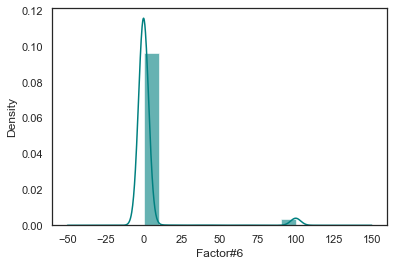

In [112]:
ax = df1['Factor#6'].hist(bins=10, density=True, stacked=True, color='teal', alpha=0.6)
df1['Factor#6'].plot(kind='density', color='teal')
ax.set(xlabel='Factor#6')
plt.xlim()
plt.show()



As the plot is Right skewed data, the mean> median, thus we will use median to fill na values and most of the values in the column are also 0

In [113]:
# mean age
print('The mean of "Factor#6" is %.2f' %(df1['Factor#6'].mean(skipna=True)))
# median age
print('The median of "Factor#6" is %.2f' %(df1['Factor#6'].median(skipna=True))) # repalced with median

The mean of "Factor#6" is 3.48
The median of "Factor#6" is 0.00


In [114]:
df1['Factor#6'].fillna(df1['Factor#6'].median(skipna=True),inplace=True)

In [115]:
part1=df1.iloc[:,12:20]
part1.isnull().sum()

Factor#11      18
Factor#12       0
Factor#13       0
Factor#14     154
Factor#15       0
Factor#16    1906
Factor#17    1906
Factor#18    1906
dtype: int64

2.2 Factor#16 ,#17,#18   1906 values missing

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:title={'center':'Factor#18'}, xlabel='Factor#18', ylabel='Density'>

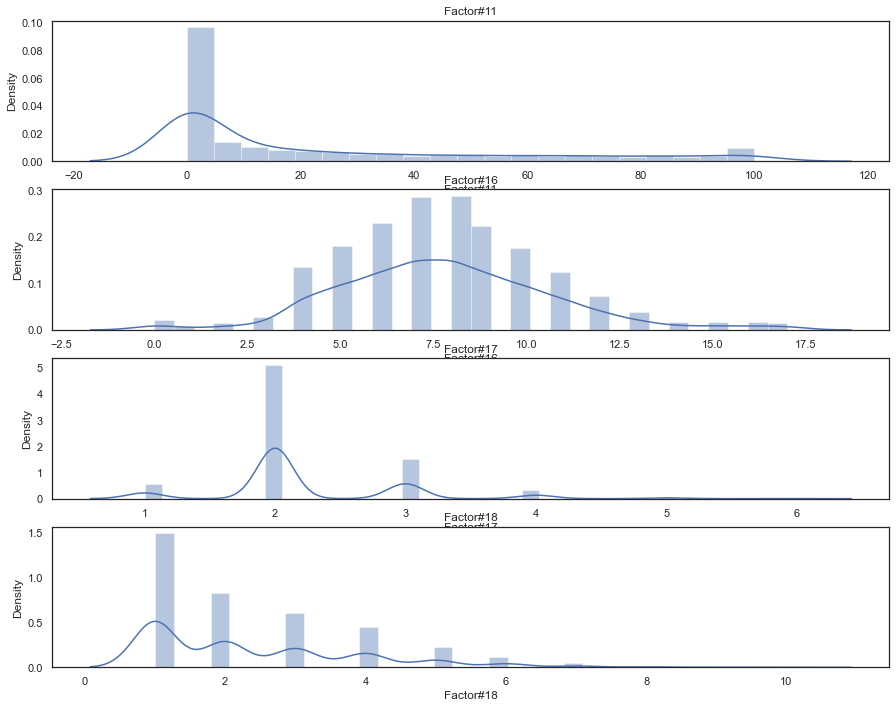

In [116]:
fig = plt.figure(figsize=(15,15))

#  subplot #1
plt.subplot(511)
plt.title('Factor#11')
sns.distplot(df1['Factor#11'])

#  subplot #2
plt.subplot(512)
plt.title('Factor#16')
sns.distplot(df1['Factor#16'])

#  subplot #3
plt.subplot(513)
plt.title('Factor#17')
sns.distplot(df1['Factor#17'])

#  subplot #4
plt.subplot(514)
plt.title('Factor#18')
sns.distplot(df1['Factor#18'])

Replacing Factor#16 null values with mean values, as it is almost normally distributed

Replacing Factor#17 null values with 0 as it is right skewed with almost 0 values 

Replacing Factor#18 null values with median.
 

In [117]:
print('The mean of "Factor#16" is %.2f' %(df1['Factor#16'].mean(skipna=True)))

df1['Factor#11'].fillna(df1['Factor#11'].median(skipna=True),inplace=True)
df1['Factor#16'].fillna(df1['Factor#16'].mean(skipna=True),inplace=True)
df1['Factor#17'].fillna(0,inplace=True)
df1['Factor#18'].fillna(0,inplace=True)


The mean of "Factor#16" is 7.81


In [118]:
df2=df1.iloc[:,21:]
df2.isnull().sum()

Factor#20       0
Factor#21       0
Factor#22       0
Factor#23       0
Factor#24       0
Factor#25       0
Factor#26       0
Factor#27       0
Factor#28    1906
Factor#29       0
Factor#30     250
Factor#31       0
Factor#32      36
Factor#33     250
Factor#34       0
Factor#35       0
Factor#36    1845
Factor#37       0
Factor#38    1071
dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:title={'center':'Factor#38'}, xlabel='Factor#38', ylabel='Density'>

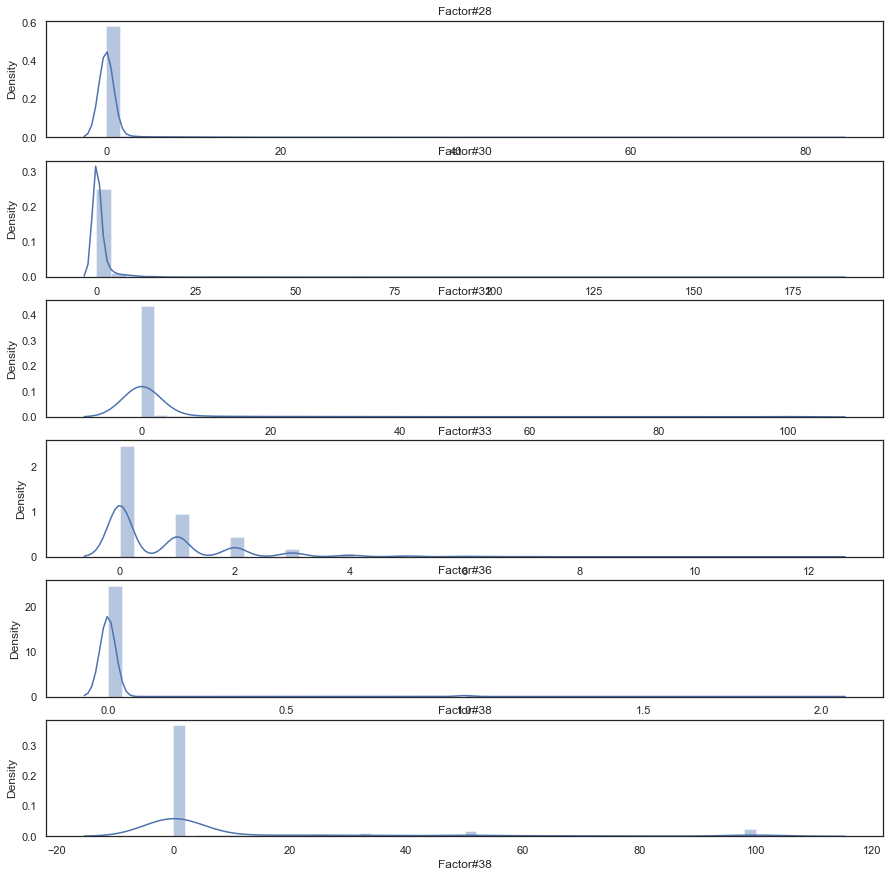

In [119]:
fig = plt.figure(figsize=(15,15))

#  subplot #1
plt.subplot(611)
plt.title('Factor#28')
sns.distplot(df1['Factor#28'])

#  subplot #2
plt.subplot(612)
plt.title('Factor#30')
sns.distplot(df1['Factor#30'])

#  subplot #3
plt.subplot(613)
plt.title('Factor#32')
sns.distplot(df1['Factor#32'])

#  subplot #4
plt.subplot(6,1,4)
plt.title('Factor#33')
sns.distplot(df1['Factor#33'])

#  subplot #5
plt.subplot(6,1,5)
plt.title('Factor#36')
sns.distplot(df1['Factor#36'])

#  subplot #6
plt.subplot(6,1,6)
plt.title('Factor#38')
sns.distplot(df1['Factor#38'])



replacing null values in these above all columns with 0 as their mean>median but most values are 0

In [120]:
df1['Factor#28'].fillna(df1['Factor#28'].median(skipna=True),inplace=True)
df1['Factor#30'].fillna(df1['Factor#30'].median(skipna=True),inplace=True)
df1['Factor#32'].fillna(df1['Factor#32'].median(skipna=True),inplace=True)
df1['Factor#33'].fillna(df1['Factor#33'].median(skipna=True),inplace=True)
df1['Factor#36'].fillna(df1['Factor#36'].median(skipna=True),inplace=True)
df1['Factor#38'].fillna(df1['Factor#38'].median(skipna=True),inplace=True)

as it is right skewed data mode>median>mean
thus replacing null values with median

In [121]:
df1.isnull().sum()

ID             0
Switched       0
Factor#1       0
Factor#2       0
Factor#3       0
Factor#4       0
Factor#5       0
Factor#6       0
Factor#7       0
Factor#8       0
Factor#9       0
Factor#10      0
Factor#11      0
Factor#12      0
Factor#13      0
Factor#14    154
Factor#15      0
Factor#16      0
Factor#17      0
Factor#18      0
Factor#19      0
Factor#20      0
Factor#21      0
Factor#22      0
Factor#23      0
Factor#24      0
Factor#25      0
Factor#26      0
Factor#27      0
Factor#28      0
Factor#29      0
Factor#30      0
Factor#31      0
Factor#32      0
Factor#33      0
Factor#34      0
Factor#35      0
Factor#36      0
Factor#37      0
Factor#38      0
dtype: int64

In [122]:
df1.drop(['Factor#14'],axis=1)

,ID,Switched,Factor#1,Factor#2,Factor#3,Factor#4,Factor#5,Factor#6,Factor#7,Factor#8,...,Factor#29,Factor#30,Factor#31,Factor#32,Factor#33,Factor#34,Factor#35,Factor#36,Factor#37,Factor#38
0,56302.0,0.0,100.0,100.000000,0.000000,0.00000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000
1,33363.0,0.0,0.0,100.000000,0.000000,76.82757,0.0,0.0,0.0,1.0,...,0.0,4.0,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,54.545455
2,33365.0,0.0,0.0,100.000000,3.000000,0.00000,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.000000,2.0,0.0,1.0,0.0,0.0,0.000000
3,56303.0,0.0,100.0,100.000000,1.313472,0.00000,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.000000,0.0,1.0,2.0,0.0,0.0,0.000000
4,56304.0,0.0,0.0,100.000000,1.000000,99.00000,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,2.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,149003.0,1.0,0.0,3.380288,0.194120,0.08863,0.0,0.0,4.0,5.0,...,1.0,1.0,20.0,10.678309,5.0,1.0,4.0,2.0,3.0,60.000000
5168,165403.0,1.0,0.0,0.000000,2.839147,0.00000,0.0,7.0,0.0,2.0,...,0.0,7.0,0.0,0.000000,1.0,1.0,2.0,0.0,0.0,25.000000
5169,165518.0,1.0,0.0,0.000000,1.000000,0.00000,0.0,100.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,3.0,0.0,0.0,0.000000
5170,165717.0,1.0,0.0,0.000000,8.000000,0.00000,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,100.000000


In [123]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 0 to 5171
Data columns (total 40 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         5171 non-null   float64
 1   Switched   5171 non-null   float64
 2   Factor#1   5171 non-null   float64
 3   Factor#2   5171 non-null   float64
 4   Factor#3   5171 non-null   float64
 5   Factor#4   5171 non-null   float64
 6   Factor#5   5171 non-null   float64
 7   Factor#6   5171 non-null   float64
 8   Factor#7   5171 non-null   float64
 9   Factor#8   5171 non-null   float64
 10  Factor#9   5171 non-null   float64
 11  Factor#10  5171 non-null   float64
 12  Factor#11  5171 non-null   float64
 13  Factor#12  5171 non-null   float64
 14  Factor#13  5171 non-null   float64
 15  Factor#14  5017 non-null   float64
 16  Factor#15  5171 non-null   float64
 17  Factor#16  5171 non-null   float64
 18  Factor#17  5171 non-null   float64
 19  Factor#18  5171 non-null   float64
 20  Factor#1

Now we have No NULL Values in the dataset !

# NOW we will see which features affects the Swtiched=Yess/Not column

In [124]:
from sklearn.preprocessing import scale 


In [125]:
dff=df1.iloc[:,0:]

In [126]:
df2=df1.iloc[:,1:]       #df2 contains all features except ID column
df2.head()

,Switched,Factor#1,Factor#2,Factor#3,Factor#4,Factor#5,Factor#6,Factor#7,Factor#8,Factor#9,...,Factor#29,Factor#30,Factor#31,Factor#32,Factor#33,Factor#34,Factor#35,Factor#36,Factor#37,Factor#38
0,0.0,100.0,100.0,0.000000,0.00000,0.0,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000
1,0.0,0.0,100.0,0.000000,76.82757,0.0,0.0,0.0,1.0,100.000000,...,0.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,54.545455
2,0.0,0.0,100.0,3.000000,0.00000,0.0,0.0,0.0,1.0,0.011572,...,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.000000
3,0.0,100.0,100.0,1.313472,0.00000,0.0,0.0,0.0,1.0,0.000000,...,0.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.000000
4,0.0,0.0,100.0,1.000000,99.00000,1.0,0.0,0.0,1.0,0.141928,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.000000


In [127]:
df2.isna().sum()

Switched       0
Factor#1       0
Factor#2       0
Factor#3       0
Factor#4       0
Factor#5       0
Factor#6       0
Factor#7       0
Factor#8       0
Factor#9       0
Factor#10      0
Factor#11      0
Factor#12      0
Factor#13      0
Factor#14    154
Factor#15      0
Factor#16      0
Factor#17      0
Factor#18      0
Factor#19      0
Factor#20      0
Factor#21      0
Factor#22      0
Factor#23      0
Factor#24      0
Factor#25      0
Factor#26      0
Factor#27      0
Factor#28      0
Factor#29      0
Factor#30      0
Factor#31      0
Factor#32      0
Factor#33      0
Factor#34      0
Factor#35      0
Factor#36      0
Factor#37      0
Factor#38      0
dtype: int64

In [128]:
df3=pd.DataFrame(dff.corr())

<AxesSubplot:>

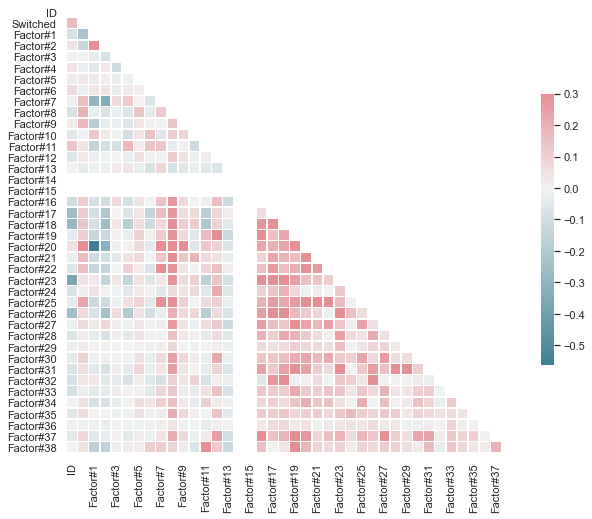

In [129]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = dff.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [130]:
dff1=dff.drop('Factor#14',axis=1)

In [131]:
dff2=dff1.drop('Factor#15',axis=1)
dff2

,ID,Switched,Factor#1,Factor#2,Factor#3,Factor#4,Factor#5,Factor#6,Factor#7,Factor#8,...,Factor#29,Factor#30,Factor#31,Factor#32,Factor#33,Factor#34,Factor#35,Factor#36,Factor#37,Factor#38
0,56302.0,0.0,100.0,100.000000,0.000000,0.00000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000
1,33363.0,0.0,0.0,100.000000,0.000000,76.82757,0.0,0.0,0.0,1.0,...,0.0,4.0,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,54.545455
2,33365.0,0.0,0.0,100.000000,3.000000,0.00000,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.000000,2.0,0.0,1.0,0.0,0.0,0.000000
3,56303.0,0.0,100.0,100.000000,1.313472,0.00000,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.000000,0.0,1.0,2.0,0.0,0.0,0.000000
4,56304.0,0.0,0.0,100.000000,1.000000,99.00000,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,2.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,149003.0,1.0,0.0,3.380288,0.194120,0.08863,0.0,0.0,4.0,5.0,...,1.0,1.0,20.0,10.678309,5.0,1.0,4.0,2.0,3.0,60.000000
5168,165403.0,1.0,0.0,0.000000,2.839147,0.00000,0.0,7.0,0.0,2.0,...,0.0,7.0,0.0,0.000000,1.0,1.0,2.0,0.0,0.0,25.000000
5169,165518.0,1.0,0.0,0.000000,1.000000,0.00000,0.0,100.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,3.0,0.0,0.0,0.000000
5170,165717.0,1.0,0.0,0.000000,8.000000,0.00000,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,100.000000


In [132]:
dff3=dff2.drop('ID',axis=1)
dff3.isna().sum()

Switched     0
Factor#1     0
Factor#2     0
Factor#3     0
Factor#4     0
Factor#5     0
Factor#6     0
Factor#7     0
Factor#8     0
Factor#9     0
Factor#10    0
Factor#11    0
Factor#12    0
Factor#13    0
Factor#16    0
Factor#17    0
Factor#18    0
Factor#19    0
Factor#20    0
Factor#21    0
Factor#22    0
Factor#23    0
Factor#24    0
Factor#25    0
Factor#26    0
Factor#27    0
Factor#28    0
Factor#29    0
Factor#30    0
Factor#31    0
Factor#32    0
Factor#33    0
Factor#34    0
Factor#35    0
Factor#36    0
Factor#37    0
Factor#38    0
dtype: int64

In [133]:
# top n rows ordered by multiple columns
#df3.nlargest(3,
df4=pd.DataFrame(df3['Switched'])
df4.nlargest(3,'Switched')

,Switched
Switched,1.000000
Factor#20,0.379961
Factor#25,0.233896


In [134]:
df4.nsmallest(3,'Switched')

,Switched
Factor#1,-0.219751
Factor#2,-0.131150
Factor#13,-0.036706


In [135]:
#thus we will use Factor#1, Factor#20, Factor#25 for our further analysis


#Pearsons' correlation coefficient =The covariance of two variables divided by the product of their standard deviations. 
#It is usually represented by ρ (rho) or r ==> ρ (X,Y) = cov (X,Y) / σX.

conditions: r has range [-1,1]
r=0 No linear Relation,
r=(0,0.6) or (-0.6,0) WEAK LINEAR relation
r=[0.6,0.85) or (-0.85,-0.6] MODERATE LINEAR relation
r=[0.85,1] or [-1,-0.85] STRONG LINEAR relation 

#............observation: as r=correlation coefficient 
Factor#1=	-0.219751 
Factor#20=	0.379961
Factor#25=	0.233896 (MODERATE LINEAR relation)..............'''

# 3. Building Logistic regression model with confuion matrix as method validation matrx and feature selection

In [136]:
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score

# model 1

In [137]:
# input for model 
X = dff3.iloc[:,1:] 
X

,Factor#1,Factor#2,Factor#3,Factor#4,Factor#5,Factor#6,Factor#7,Factor#8,Factor#9,Factor#10,...,Factor#29,Factor#30,Factor#31,Factor#32,Factor#33,Factor#34,Factor#35,Factor#36,Factor#37,Factor#38
0,100.0,100.000000,0.000000,0.00000,0.0,0.0,0.0,1.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000
1,0.0,100.000000,0.000000,76.82757,0.0,0.0,0.0,1.0,100.000000,0.001623,...,0.0,4.0,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,54.545455
2,0.0,100.000000,3.000000,0.00000,0.0,0.0,0.0,1.0,0.011572,0.012218,...,1.0,0.0,0.0,0.000000,2.0,0.0,1.0,0.0,0.0,0.000000
3,100.0,100.000000,1.313472,0.00000,0.0,0.0,0.0,1.0,0.000000,96.441656,...,0.0,2.0,0.0,0.000000,0.0,1.0,2.0,0.0,0.0,0.000000
4,0.0,100.000000,1.000000,99.00000,1.0,0.0,0.0,1.0,0.141928,0.073721,...,0.0,0.0,0.0,0.000000,0.0,0.0,2.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,0.0,3.380288,0.194120,0.08863,0.0,0.0,4.0,5.0,4.008117,0.410344,...,1.0,1.0,20.0,10.678309,5.0,1.0,4.0,2.0,3.0,60.000000
5168,0.0,0.000000,2.839147,0.00000,0.0,7.0,0.0,2.0,0.777813,0.422231,...,0.0,7.0,0.0,0.000000,1.0,1.0,2.0,0.0,0.0,25.000000
5169,0.0,0.000000,1.000000,0.00000,0.0,100.0,0.0,1.0,0.669018,0.003912,...,0.0,0.0,0.0,0.000000,0.0,0.0,3.0,0.0,0.0,0.000000
5170,0.0,0.000000,8.000000,0.00000,0.0,0.0,2.0,1.0,0.075443,0.002088,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,100.000000


In [138]:
 # input for model 
y = dff3.iloc[:,0]
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5167    1.0
5168    1.0
5169    1.0
5170    1.0
5171    1.0
Name: Switched, Length: 5171, dtype: float64

In [139]:
import numpy as np
y1=y.to_numpy()
type(y1)
y1

array([0., 0., 0., ..., 1., 1., 1.])

In [140]:
# Dividing the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.3)

In [141]:
model1=LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)

In [142]:
model1.classes_

array([0., 1.])

In [143]:
model1.intercept_

array([-3.32615268])

In [144]:
model1.coef_

array([[-1.35729449e-02, -1.15114797e-03,  1.22695873e-03,
        -4.85807712e-03,  6.67521418e-03, -2.50099471e-03,
         6.81850100e-02,  1.39376895e-03,  3.86049727e-03,
        -1.90001042e-03,  6.41847579e-04,  3.69295379e-03,
        -1.50334968e-01,  2.31217481e-02,  8.24358952e-03,
         1.42438932e-01, -2.89001384e-02,  9.22015969e-01,
         7.79634459e-02, -2.35038460e-03, -1.92424414e-02,
         3.43774489e-01,  3.37099721e-01, -5.64195700e-04,
         1.60292275e-03, -2.35947075e-02,  4.41354576e-02,
         1.38962236e-02, -2.42400835e-02,  2.11535979e-04,
        -2.56836363e-01, -8.12515043e-02, -2.38605245e-03,
        -1.10222274e+00,  2.21934711e-02, -2.71099691e-03]])

# Step 4: Evaluate the Model

In [145]:
y_pred=model1.predict(X_test)
y_predd=pd.DataFrame(y_pred)
y_predd.to_numpy()
y_predd

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1547,0.0
1548,0.0
1549,0.0
1550,0.0


# Feature selection:

In [146]:
model2=LogisticRegression(solver='liblinear', random_state=0).fit(X, y)

from sklearn.feature_selection import RFE
rfe = RFE(model2, 3)
rfe = rfe.fit(X, y)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWa

In [147]:
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Factor#20', 'Factor#25', 'Factor#36']


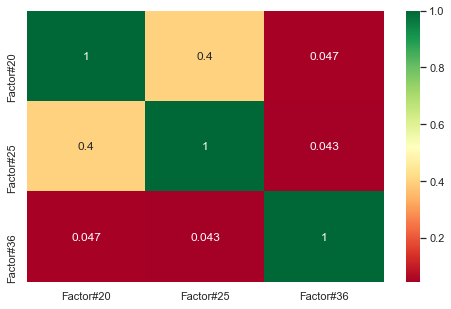

In [148]:
Selected_features = ['Factor#20', 'Factor#25', 'Factor#36']
X_rfe = X[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X_rfe.corr(), annot=True, cmap="RdYlGn")
plt.show()

# RFE WITH CROSS VALIDATION:

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Optimal number of features: 15
Selected features: ['Factor#7', 'Factor#8', 'Factor#13', 'Factor#16', 'Factor#18', 'Factor#20', 'Factor#21', 'Factor#22', 'Factor#24', 'Factor#25', 'Factor#28', 'Factor#31', 'Factor#33', 'Factor#34', 'Factor#36']


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

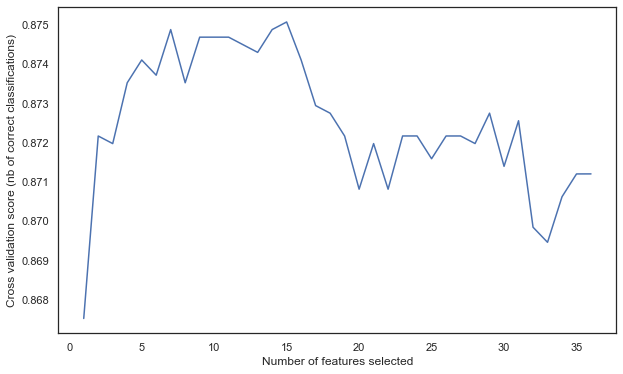

In [149]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

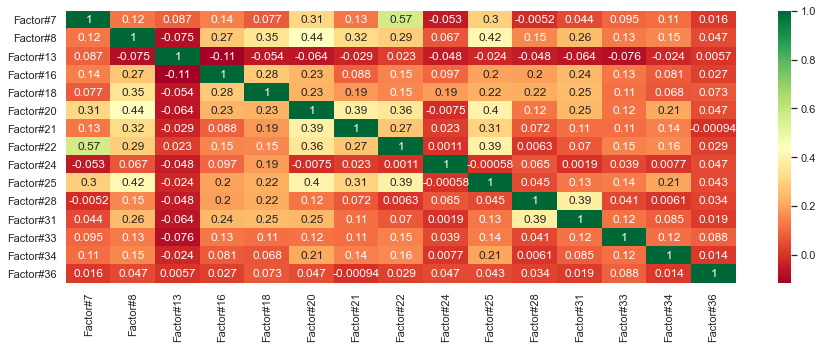

In [150]:
Selected_features = ['Factor#7', 'Factor#8', 'Factor#13', 'Factor#16', 'Factor#18', 'Factor#20', 'Factor#21', 'Factor#22', 'Factor#24', 'Factor#25', 'Factor#28', 'Factor#31', 'Factor#33', 'Factor#34', 'Factor#36']
X_rfecv = X[Selected_features]

plt.subplots(figsize=(15, 5))
sns.heatmap(X_rfecv.corr(), annot=True, cmap="RdYlGn")
plt.show()

# Building a Logistic regression model using RFE with cross validation

In [151]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X =X_rfecv
y = y

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)



LogisticRegression()

In [152]:
X_test

,Factor#7,Factor#8,Factor#13,Factor#16,Factor#18,Factor#20,Factor#21,Factor#22,Factor#24,Factor#25,Factor#28,Factor#31,Factor#33,Factor#34,Factor#36
2361,0.0,1.0,0.0,7.809188,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4273,0.0,1.0,0.0,5.000000,4.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2339,0.0,1.0,1.0,7.809188,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3564,1.0,1.0,1.0,6.000000,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2975,1.0,1.0,1.0,9.000000,4.0,1.0,1.0,1.0,0.0,1.0,3.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,2.0,1.0,0.0,7.000000,1.0,1.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4213,0.0,1.0,0.0,8.000000,4.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5002,0.0,2.0,0.0,17.000000,5.0,2.0,1.0,2.0,0.0,1.0,23.0,8.0,1.0,0.0,0.0
1935,4.0,2.0,0.0,13.000000,4.0,3.0,1.0,11.0,2.0,2.0,0.0,0.0,2.0,7.0,0.0


In [153]:
y_test

2361    0.0
4273    0.0
2339    0.0
3564    0.0
2975    0.0
       ... 
2313    0.0
4213    0.0
5002    1.0
1935    0.0
3965    0.0
Name: Switched, Length: 1035, dtype: float64

In [154]:
y_pred=logreg.predict(X_test)
y_pred_proba=logreg.predict_proba(X_test)

In [155]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[885  14]
 [108  28]]


In [157]:
accuracy_score(y_test, y_pred)

0.8821256038647343

In [158]:
log_loss(y_test, y_pred_proba)

0.3118439582664633

In [159]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)      # Y= Y actual, classifier.predict_proba(X)[:1]= Y predicted

auc = roc_auc_score(y_test, y_pred)



In [160]:
auc

0.595154747104626

In [161]:
fpr

array([0.        , 0.01557286, 1.        ])

In [162]:
tpr

array([0.        , 0.20588235, 1.        ])

In [163]:
thresholds

array([2., 1., 0.])

Text(0, 0.5, 'True Positive Rate')

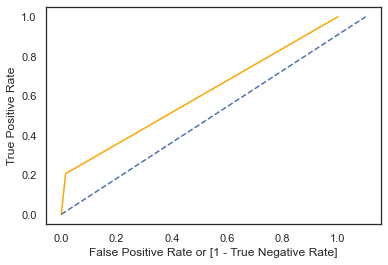

In [164]:

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='orange', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1.1], [0, 1], 'b--')


plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')